# Numpy Basic Tutorial : 배열과 벡터 계산
Numerical Python의 줄임말, 고성능의 과학계산 컴퓨팅과 데이터 분석에 필요한 기본 패키지이며 Numpy가 제공하는 기능은 아래와 같다.
* 빠르고 메모리를 효율적으로 사용하며 벡터 산술연산과 세련된 브로드 캐스팅 기능을 제공하는 다차원 배열인 ndarray
* 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 표준 수학 함수
* 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 올려진 파일을 사용하는 도구
* 선형대수, 난수 발생기, 푸리에 변환가능
* C, C++, 포트란으로 쓰여진 코드를 통합하는 코드  

튜토리얼은 아래의 목차로 구성되어있다.<br>
(본 튜토리얼은 "파이썬 라이브러리를 활용한 데이터 분석 - 한빛 미디어"의 서적을 토대로 만들어졌다.)

---
- **1. ndarray : 다차원 배열 객체 (= 배열, array)**
    - 1.1 ndarray 생성
    - 1.2 ndarray의 자료형
    - 1.3 배열과 스칼라의 연산
    - 1.4 색인과 슬라이싱 기초
        - 1.4.1 1차원 배열
        - 1.4.2 다차원 배열
        - 1.4.3 슬라이스 색인
    - 1.5 불리언 색인
    - 1.6 팬시 색인
    - 1.7 배열 전치와 축 바꾸기  
- **2. 유니버설 함수**
- **3. 배열을 사용한 데이터 처리**
    - 3.1 배열연산을 조건절 표현하기
    - 3.2 수학메서드와 통계 메서드
    - 3.3 불리언배열을 위한 메서드
    - 3.4 정렬
    - 3.5 집합함수
- **4. 선형대수**
- **5. 난수생성**
---

##  1. ndarray : 다차원 배열 객체 (= 배열, array)
Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 형태, 각각의 값들은 튜플(이때 튜플은 양의 정수만을 요소값으로 갖는다) 형태로 색인된다. rank는 배열이 몇차원인지를 의미하며, shape는 각 차원의 크기를 알려주는 정수들이 모인 튜플이다.<br>
* 배열의 모든 원소는 같은 자료형이어야한다.
* 모든 배열은 각 차원의 크기를 알려주는 shape라는 튜플과 배열에 저장된 자료형을 알려주는 dtype라는 객체를 가지고 있다.


In [5]:
import numpy as np
data = np.random.randn(2,3)
data

array([[-0.31181349,  0.75769719, -1.38719257],
       [-0.33643825, -0.72768672,  0.55763802]])

In [6]:
data * 10 # 배열의 각각의 위치에 있는 값에 10이 곱해진다.

array([[ -3.11813492,   7.57697186, -13.87192574],
       [ -3.36438245,  -7.27686721,   5.57638025]])

In [7]:
data + data # 각각의 위치에 해당하는 값들 끼리 더해진다.

array([[-0.62362698,  1.51539437, -2.77438515],
       [-0.67287649, -1.45537344,  1.11527605]])

In [8]:
print(data.shape, type(data.shape))

(2, 3) <class 'tuple'>


In [9]:
print(data.dtype, type(data.dtype))

float64 <class 'numpy.dtype'>


### 1.1 ndarray 생성
배열을 생성하는 가장 쉬운 방법은 array 함수를 이용하는 것이다. 순차적인 객체(다른 배열도 포함하여)를 받아 넘겨받은 데이터가 들어있는 새로운 Numpy 배열을 생성한다.<br>
아래는 배열을 생성하는 함수 목록이다. Numpy는 산술연산에 초점이 맞춰져있기 때문에 만약 자료형이 명시되지 않는다면 float64(부동소수점)가 될 것이다.

**<표> 배열 생성함수 **

|        함수       |                                                                                           설명                                                                                          |
|:-----------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|       array       |        입력데이터(리스트, 튜플, 배열 또는 다른 순차형 데이터)를 ndarray로 변환하여 dtype이 명시되지 않은 경우에는 자료형을 추론하여 저장한다. 기본적으로 입력 데이터는 복사된다.        |
|      asarray      |                                                입력 데이터를 ndarray로 변환하지만 입력 데이터가 이미 ndarray일 경우, 복사가 되지 않는다.                                                |
|       arange      |                                                               내장 range 함수와 유사하지만 리스트 대신 ndarray를 반환한다.                                                              |
|  ones, ones_like  | 주어진 dtype과 주어진 모양을 가지는 배열을 생성하고 내용을 모두 1로 초기화한다. ones_like는 주어진 배열과 동일한 모영과 dtype를 가지는 배열을 새로 생성하여 내용을 모두 1로 초기화한다. |
| zeros, zeros_like |                                                                      ones, ones_like와 같지만 내용을 0으로 채운다.                                                                      |
| empty, empty_like |                                                  메모리를 할당하여 새로운 배열을 생성하지만 ones나 zeros처럼 값을 초기화하지는 않는다.                                                  |
|   eye, identity   |                                                                              N x N의 단위 행렬을 생성한다.                                                                              |

In [10]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1, arr1.ndim,arr1.shape, arr1.dtype)

[ 6.   7.5  8.   0.   1. ] 1 (5,) float64


In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2, arr2.ndim, arr2.shape, arr2.dtype)

[[1 2 3 4]
 [5 6 7 8]] 2 (2, 4) int32


In [12]:
data3 = np.ones(10)
print(data3, data3.ndim, data3.shape, data3.dtype)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 1 (10,) float64


In [13]:
data4 = np.ones_like(data2)
print(data4, data4.ndim, data4.shape, data4.dtype)

[[1 1 1 1]
 [1 1 1 1]] 2 (2, 4) int32


In [14]:
data5 = np.zeros(10)
print(data5, data5.ndim, data5.shape, data5.dtype)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1 (10,) float64


In [15]:
data5 = np.zeros_like(data2)
print(data5, data5.ndim, data5.shape, data5.dtype)

[[0 0 0 0]
 [0 0 0 0]] 2 (2, 4) int32


In [16]:
data6 = np.arange(10) # 파이썬의 range 함수의 배열 버전
print(data6, data6.ndim, data6.shape, data6.dtype)

[0 1 2 3 4 5 6 7 8 9] 1 (10,) int32


In [17]:
data7 = np.empty((2,3,2)) # empty 함수는 초기화되지 않은 배열을 생성하는데, 다차원 배열의 원하는 형태를 튜플로 넘기면 된다.
data8 = np.empty_like(data2)
print(data7, data8)

[[[  1.28130610e-311   1.28127303e-311]
  [  0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000]]

 [[  0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000]]] [[0 0 0 0]
 [0 0 0 0]]


In [18]:
print(np.eye(2))
print(np.identity(2))

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


### 1.2 ndarray의 자료형
* 자료형, dtype은 ndarray가 특정 데이터를 메모리에서 해석하기위해 필요한 정보를 담고 있는 특수한 객체
* ndarray를 생성할 때 dtype을 지정해 줄 수 있다.
* ndarray의 astype 메서드를 이용하여 배열의 dtype을 다른 형으로 명시적 변경이 가능

**<표> Numpy 자료형 **

|                종류               |   Type Code  |                                                   설명                                                  |
|:---------------------------------:|:------------:|:-------------------------------------------------------------------------------------------------------:|
|             int8, uint8           |    i1, u1    |                       부호가 있는 8비트(1바이트) 정수형과 부호가 없는 8비트 정수형                      |
|           int16, uint16           |    i2, u2    |                          부호가 있는 16비트 정수형과 부호가 없는 16비트 정수형                          |
|           int32, uint32           |    i4, u4    |                          부호가 있는 32비트 정수형과 부호가 없는 32비트 정수형                          |
|           int64, uint64           |    i8, u8    |                          부호가 있는 64비트 정수형과 부호가 없는 64비트 정수형                          |
|              float16              |      f2      |                                           반정밀도 부동 소수점                                          |
|              float32              |   f4 또는 f  |                               단정밀도 부동소수점, C 언어의 float형과 호환                              |
|              float64              |   f8 또는 d  |                   배정밀도 부동소수점, C 언어의 double형과 파이썬의 float 객체와 호환                   |
|              float128             |  f16 또는 g  |                                          확장 정밀도 부동소수점                                         |
| complex64, complex128, complex256 | c8, c16, c32 |                         각각 2개의 32, 64, 128비트 부동소수점형을 가지는 복소수                         |
|                boo1               |       ?      |                                    True, False 값을 저장하는 불리언형                                   |
|               object              |       0      |                                              파이썬 객체형                                              |
|              string_             |       S      |             고정 길이 문자열형(각 글자는 1바이트), 길이가 10인 문자열의 dtype은 S10이 된다.             |
|              unicode_             |       U      | 고정 길이 유니코드형(플랫폼에 따라 글자별 바이트 수는 다르다).<br> strings_형과 같은 형식을 쓴다.(예 : U10) |

In [196]:
np.typecodes 

{'All': '?bhilqpBHILQPefdgFDGSUVOMm',
 'AllFloat': 'efdgFDG',
 'AllInteger': 'bBhHiIlLqQpP',
 'Character': 'c',
 'Complex': 'FDG',
 'Datetime': 'Mm',
 'Float': 'efdg',
 'Integer': 'bhilqp',
 'UnsignedInteger': 'BHILQP'}

In [197]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128],
 'float': [numpy.float16, numpy.float32, numpy.float64],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, str, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [198]:
# 자료형을 명시적으로 지정하여 ndarray를 생성
arr1= np.array([1,2,3], dtype = np.float64)
arr2= np.array([1,2,3], dtype = np.int32)
print(arr1.dtype, arr2.dtype)

float64 int32


In [199]:
# ndarrary 클래스일 경우 astype 메서드를 사용하여 배열의 dtype을 다른 형으로 명시적을 변경
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.astype(np.float64)
print(arr ,arr.dtype)
print(float_arr, float_arr.dtype)

[1 2 3 4 5] int32
[ 1.  2.  3.  4.  5.] float64


In [200]:
# 부동소수점 숫자자료형을 정수형으로 변환시 소수잠 아랫자리는 버려진다.
arr1 = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr1, arr1.astype(np.int32))

[  3.7  -1.2  -2.6   0.5  12.9  10.1] [ 3 -1 -2  0 12 10]


In [201]:
#숫자 형식의 문자열을 담고 있는 배열이 있다면 astype를 사용하여 숫자로 변환할 수 있다.
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
print(numeric_strings, numeric_strings.dtype)
numeric_strings.astype(np.float64)

[b'1.25' b'-9.6' b'42'] |S4


array([  1.25,  -9.6 ,  42.  ])

In [202]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype = np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [203]:
empty_uint32 = np.empty(8, dtype = 'u4')
empty_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### 1.3 배열과 스칼라 간의 연산
배열은 for 반복문을 작성하지 않고 데이터를 일괄처리할 수 있기 때문에 중요하다.(Vectorization) 같은 크기의 배열 간 산술연산은 각 요소 단위로 적용된다.

In [204]:
arr = np.array([[1, 2, 3,], [4, 5, 6]])
print(arr)

[[1 2 3]
 [4 5 6]]


In [205]:
print(arr * arr)
print(arr + arr)
print(1 / arr)
print(arr ** 0.5)

[[ 1  4  9]
 [16 25 36]]
[[ 2  4  6]
 [ 8 10 12]]
[[ 1.          0.5         0.33333333]
 [ 0.25        0.2         0.16666667]]
[[ 1.          1.41421356  1.73205081]
 [ 2.          2.23606798  2.44948974]]


### 1.4 색인과 슬라이싱 기초

#### 1.4.1 1차원 배열
* 1차원 배열은 리스트와 유사하게 작동한다. 리스트와의 중요한 차이점은 배열 조각(slice)는 원본 배열의 뷰(view)라는 점, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다는 뜻
* 뷰 대신 ndarray 슬라이스의 복사본을 얻고 싶다면 ndarray[].copy()를 사용해서 명시적으로 배열을 복사해서 활용하자

In [206]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]


In [207]:
arr[5:8] = 12 #브로드캐스팅
print(arr)

[ 0  1  2  3  4 12 12 12  8  9]


In [208]:
# arr_slice는 arr의 슬라이스의 뷰가아니라 원본 배열의 뷰이기 때문에 아래의 코드때문에 원본 배열때문에 변경된 것을 볼 수 있다.
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr_slice, arr)

[   12 12345    12] [    0     1     2     3     4    12 12345    12     8     9]


In [209]:
arr_slice[:] = 64
print(arr_slice, arr)

[64 64 64] [ 0  1  2  3  4 64 64 64  8  9]


In [210]:
# ndarray[].copy()를 이용
arr_slice1 = arr[5:8].copy()
print(arr_slice1)

[64 64 64]


In [211]:
arr_slice1[:] = 15
print(arr_slice1, arr)

[15 15 15] [ 0  1  2  3  4 64 64 64  8  9]


#### 1.4.2 다차원 배열
* 2차원 배열에서 각 색인에 해당하는 요소는 스칼라 값이 아니라 1차원 배열이 된다.
* 2차원 배열의 경우 0번째 축, 1번째 축 중 0번째를 먼저 기준으로 하여 슬라이싱

In [212]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [213]:
print(arr2d[0], arr2d[1], arr2d[2])

[1 2 3] [4 5 6] [7 8 9]


In [214]:
print(arr2d[0,2], arr2d[0][2])

3 3


In [215]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10 ,11 ,12]]])

In [216]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [217]:
print(arr3d[0])
print(arr3d[1])
print(arr3d[0,1], arr3d[0][1,0])

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[4 5 6] 4


In [218]:
old_values = arr3d[0].copy()
arr3d[0]= 42
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


In [219]:
arr3d[0] = old_values
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


#### 1.4.3 슬라이스 색인

In [220]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [221]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [222]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [223]:
print(arr2d[:2,1:])
print(arr2d[1,1:], arr2d[2,:2])

[[2 3]
 [5 6]]
[5 6] [7 8]


In [224]:
arr2d[1,1]

5

In [225]:
arr2d[:,:1] # :은 단독으로 쓰였을 때 전체를 선택한다는 의미
print(arr2d[:2,:1])

[[1]
 [4]]


In [226]:
arr2d[:1,1:] = 0 # 슬라이싱 구문에 값을 대입하면 선택 영역 전체에 값이 할당된다.
print(arr2d)

[[1 0 0]
 [4 5 6]
 [7 8 9]]


### 1.5 불리언 색인
* 불리언 배열은 반드시 색인하려는 축의 길이와 동일한 길이를 가져야한다.
* 불리언 배열 색인도 슬라이스 또는 숫자 색인과 함께 혼용할 수 있다.
* 배열에 불리언 색인을 이용해서 데이터를 선택하면 원본 배열의 뷰가 아니라 복사본이다.
* 여러개의 불리언 조건을 사용하려면 &(and)나 |(or)를 활용한다.

In [227]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
print(names)
print(data, data.shape)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.57604683  0.96272551 -0.17703719 -0.89563162]
 [ 0.60247348 -0.17377203  0.32003499 -0.12425465]
 [ 0.17521408  0.33513574 -0.53297111 -0.49849708]
 [-0.10808443 -1.50862251  2.17756818 -1.16182667]
 [ 0.11683128  0.58385058  1.4951534  -0.31066727]
 [ 1.12119866  0.22425302  2.31914197  0.11028973]
 [ 1.73337845  0.96656803  0.98559527  0.51638712]] (7, 4)


각각의 이름은 data 배열의 각 로우에 대응한다고 가정하고 아래와 같이 색인할 수 있다.

In [228]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [229]:
data[names == 'Bob']

array([[-0.57604683,  0.96272551, -0.17703719, -0.89563162],
       [-0.10808443, -1.50862251,  2.17756818, -1.16182667]])

In [230]:
data[names == 'Bob', :1]

array([[-0.57604683],
       [-0.10808443]])

In [231]:
data[names == 'Bob', 1]

array([ 0.96272551, -1.50862251])

In [232]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [233]:
print(data[names != 'Bob']) # equal to data[names != 'Bob',]
print(data[~(names == 'Bob')]) # 부정을 의미할때 ~를 사용한다.

[[ 0.60247348 -0.17377203  0.32003499 -0.12425465]
 [ 0.17521408  0.33513574 -0.53297111 -0.49849708]
 [ 0.11683128  0.58385058  1.4951534  -0.31066727]
 [ 1.12119866  0.22425302  2.31914197  0.11028973]
 [ 1.73337845  0.96656803  0.98559527  0.51638712]]
[[ 0.60247348 -0.17377203  0.32003499 -0.12425465]
 [ 0.17521408  0.33513574 -0.53297111 -0.49849708]
 [ 0.11683128  0.58385058  1.4951534  -0.31066727]
 [ 1.12119866  0.22425302  2.31914197  0.11028973]
 [ 1.73337845  0.96656803  0.98559527  0.51638712]]


In [234]:
data[(names == 'Bob') | (names == 'Joe')]

array([[-0.57604683,  0.96272551, -0.17703719, -0.89563162],
       [ 0.60247348, -0.17377203,  0.32003499, -0.12425465],
       [-0.10808443, -1.50862251,  2.17756818, -1.16182667],
       [ 1.12119866,  0.22425302,  2.31914197,  0.11028973],
       [ 1.73337845,  0.96656803,  0.98559527,  0.51638712]])

### 1.6 팬시 색인
* 정수 배열을 사용한 색인
* 불리언 색인과 마찬가지로 선택된 데이터를 새로운 배열로 복사한다.
* 특정한 순서로 로우를 선택하고 싶다면 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 넘긴다.

In [235]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print(arr)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [236]:
arr[[3,2,1,0]]

array([[ 3.,  3.,  3.,  3.],
       [ 2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [237]:
arr[[-3,-5,-7]] # 색인으로 음수를 사용하면 끝에서부터 로우를 선택한다.

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

### 1.7 배열 전치와 축 바꾸기
배열 전치는 데이터를 복사하지 않고 데이터 모양이 바뀐 뷰를 반환하는 기능
* 2차원 배열이나 1차원 배열의 경우 ndarray.T의 형태로 T라는 메서드를 활용한다.
* 다차원 배열의 경우 ndarray.transpose()의 형태로 축번호를 인자로 넣는다.(ndarray.shape)의 결과물을 활용하여 치환하면됨

In [238]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [239]:
arr.T # Transpose 전치

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [240]:
#내적계산
vector1 = np.array([1,1])
np.dot(vector1.T, vector1)

2

In [241]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [242]:
x = np.ones((2, 2, 3))

In [243]:
x
print(x, x.shape) # 0번축이 배열의 개수 2개, 1번축이 배열의 행 2행, 2번축이 배열의 열의 개수 3열

[[[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]] (2, 2, 3)


In [244]:
x.transpose((2,1,0)) # 각축의 번호를 인자로 넣어서 3 * 2 * 2의 다차원 배열을 생성할 수 있다.
print(x.transpose((2,1,0)), x.transpose((2,1,0)).shape)

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]] (3, 2, 2)


## 2. 유니버설 함수
ufunc라고 불리는 유니버설 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수. 유니버설 함수는 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결과 값을 반환하는 간단한 함수를 고속으로 수행할 수 있는 벡터화된 래퍼 함수라고 생각하면 된다.

** <표> 단항 유니버설 함수 **<br>
하나의 인자를 받아서 하나 또는 그이상의 배열을 리턴한다.

|           함수          |                                                                       설명                                                                       |
|:-----------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------:|
|        abs, fabs        | 각 원소(정수, 실수, 복소수)의 절대값을 구한다. 복소수가 아닌 경우에는 빠른 연산을 위해 fabs를 사용한다.                                          |
|           sqrt          | 각 원소의 제곱근을 계산한다.                                                                                                                     |
|          square         | 각 원소의 제곱을 계산한다.                                                                                                                       |
|           exp           | 각 원소에서 지수 exp(x)를 계산한다.                                                                                                              |
| log, log10, log2, log1p | 순서대로 자연로그, 밑이 10인 로그, 밑이 2인 로그, 자연로그(1+x)                                                                                  |
|           sign          | 각 원소의 부호를 계산한다. 1(양수), 0(영), -1(음수)                                                                                              |
|           ceil          | 각 원소의 소수자리를 올린다. 각 원소의 값보다 같거나 큰 정수 중 가장 작은 정수를 반환한다.                                                       |
|          floor          | 각 원소의 소수자리를 내린다. 각 원소의 값보다 작거나 같은 정수 중 가장 작은 정수를 반환한다.                                                     |
|           rint          | 각 원소의 소수자리를 반올림한다. dtype은 유지된다.                                                                                               |
|           modf          | 각 원소의 몫과 나머지를 각각의 배열로 반환한다. (원소가 분수(소수)일 때)                                                                         |
|          isnan          | 각각의 원소가 숫자인지 아닌지를(NaN, Not a Number) 나타내는 불리언 배열을 반환한다. nan이 True이다.                                              |
|     isfinite, isinf     | 배열의 각 원소가 유한한지(non-inf, non-Nan), 무한한지 나타내는 불리언 배열을 반환한다.<br> isfinite은 유한한 값일 때 True, isinf는 inf일 때 True |

** <표> 이항 유니버설 함수**<br> 2개의 인자를 취해서 하나 또는 그 이상의 배열을 리턴한다.

|                            함수                            |                                                                                             설명                                                                                             |
|:----------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|                             add                            |                                                                           두 배열에서 같은 위치의 원소끼리 더한다.                                                                           |
|                          subtract                          |                                                                     첫 번째 배열의 원소에서 두 번쨰 배열의 원소를 뺀다.                                                                      |
|                          multiply                          |                                                                                    배열의 원소끼리 곱한다.                                                                                   |
|                    divide, floor_divide                    |                                                       첫 번째 배열의 원소에서 두 번째 배열의 원소를 나눈다. floor_divide는 몫만 취한다.                                                      |
|                            power                           |                                                                    첫 번째 배열의 원소에 두 번째 배열이 원소만큼 제곱한다.                                                                   |
|                        maximum, fmax                       |                                                          배열의 같은 위치에 있는 두 원소 중 큰 값을 반환한다. fmax는 NaN을 무시한다.                                                         |
|                        minimum, fmin                       |                                                         배열의 같은 위치에 있는 두 원소 중 작은 값을 반환한다. fmin은 NaN을 무시한다.                                                        |
|                             mod                            |                                                         첫 번째 배열의 원소에 두 번째 배열의 원소를 나눈 나머지를 구한다. (같은 위치)                                                        |
|                          copysign                          |                                         첫 번째 배열의 원소의 부호를 두 번째 배열의 원소의 부호로 바꾼다. (부호는 +,-를 의미, 같은 위치에 있는 원소)                                         |
| greater, greater_equal, less, less_equal, equal, not_equal | 배열의 같은 위치에 있는 두 원소간의 >, >=, <=, ==, != 비교연산 결과를 불리언 배열로 반환한다. 사실 그냥 함수를 안쓰고 배열 a,b가 주어져 있으면 "a 비교연산연산자 b"를 쓰는 것과 결과는 같다. |
|            logical_and, logical_or, logical_xor            |              배열의 같은 위치에 있는 두 원소간의 논리연산 and, or, xor결과를 반환한다. 배열의 원소값이 True, False일 때 쓰는 것으로 "a 논리연산자 b" 방식으로 사용은 불가능하다.             |

## 3. 배열을 사용한 데이터 처리
numpy 배열을 사용하면 반복문을 작성하지 않고 간결한 배열연산을 통해 많은 종류의 데이터 처리 작업을 할 수 있다. 배열연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고한다.

In [245]:
#example 값이 놓여있는 그리드에서 sqrt(x^2 + y^2) 계산
points = np.arange(-5, 5, 0.01)
xs,ys = np.meshgrid(points, points) #2개의 1차원 배열을 받아 모든 가능한 (x,y) 쌍을 만들 수 있는 2차원 배열 2개를 반환
z = np.sqrt(xs ** 2 + ys ** 2)

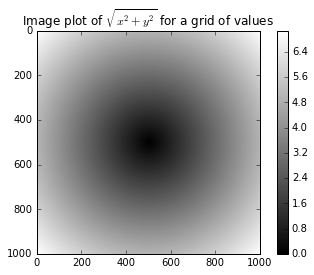

In [246]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

### 3.1 배열연산을 조건절 표현하기
* np.where : 'x if 조건 else y' 같은 삼항식의 벡터화 버전 numpy.where(cond, x, y)
* np.where의 두 번째와 세 번째 인자는 배열이 아니라도 상관없으며 둘 중 하나 혹은 둘 다 스칼라 값이라도 동작함

In [247]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [248]:
list(zip(xarr, yarr, cond))

[(1.1000000000000001, 2.1000000000000001, True),
 (1.2, 2.2000000000000002, False),
 (1.3, 2.2999999999999998, True),
 (1.3999999999999999, 2.3999999999999999, True),
 (1.5, 2.5, False)]

In [249]:
#list comprehension을 이용하여 cond 값이 True 일 때, xarr의 값이나 yarr의 값을 취하는 코드
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [250]:
np.where(cond, xarr, yarr)

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [251]:
arr = np.random.randn(4,4)
print(arr)

[[-0.92513871 -0.481156    0.31133461  1.27240751]
 [-1.27112087  0.87794074  0.43872607 -0.11905678]
 [ 0.37899424 -0.89922371 -0.64926575 -0.07650461]
 [ 1.09117035 -0.34945508  0.3232431  -0.0586077 ]]


In [252]:
# 양수의 원소값은 2로 음수인 원소값은 -2로 치환하려면
np.where(arr > 0,2,-2)

array([[-2, -2,  2,  2],
       [-2,  2,  2, -2],
       [ 2, -2, -2, -2],
       [ 2, -2,  2, -2]])

In [253]:
# 2개의 불리언 배열을 가지고 모든 조합에 대해서 다른 값을 대입하는 예제
# np.where을 사용하지않는 경우
cond1 = np.array([True, False, True])
cond2 = np.array([False, True, False])
result = []
for i in range(cond1.size):
    if cond1[i] & cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
result

[1, 2, 1]

In [254]:
np.where(cond1 & cond2,1,np.where(cond1,1,np.where(cond2,2,3)))

array([1, 2, 1])

### 3.2 수학메서드와 통계 메서드
배열 전체 혹은 배열에서 한 축에 따르는 자료에 대한 통계를 계산하기 위한 수학 함수는 배열 메서드로 사용할 수 있다. 전체의 합(sum)이나 평균(mean), 표준편차(std)는 NumPy의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해서 구할 수 있다.

** <표> 기본 배열 통계 메서드 **

|     메서드     |                                                설명                                               |
|:--------------:|:-------------------------------------------------------------------------------------------------:|
|       sum      | 배열 전체 혹은 특정 축에 대한 모든 원소의 합을 계산한다. 크기가 0인 배열에 대한 sum 결과는 0이다. |
|      mean      |                   산술평균을 구한다. 크기가 0인 배열에 대한 mean 결과는 NaN이다.                  |
|    std, var    |  각각 표준편차(std), 분산(var)를 구한다. 선택적으로 자유도를 줄 수 있으며 분모의 기본 값은 n이다. |
|    min, max    |                                           최소값, 최대값                                          |
| argmin, argmax |                              최소 원소의 색인 값, 최대 원소의 색인 값                             |
|     cumsum     |                                          각 원소의 누적합                                         |
|     cumprod    |                                          각 원소의 누적곱                                         |

In [77]:
arr = np.random.randn(5,4) # normally-distributed data
print(arr)
print(arr.mean(), np.mean(arr))
print(arr.sum(), np.sum(arr))

[[ 1.47333937 -1.73453471  0.32878592  0.0478528 ]
 [ 0.18654302 -0.92260707 -0.84956495  0.47804807]
 [-0.35562351 -1.36871594 -0.38038074  0.10837459]
 [-1.67850343 -1.60769901 -0.22118499 -0.69178516]
 [-0.01883522  1.13477664  0.14558269 -1.12263844]]
-0.352438503956 -0.352438503956
-7.04877007911 -7.04877007911


In [78]:
arr.mean(axis = 0) # ColMeans,0번째 축을 따라 평균

array([-0.07861595, -0.89975602, -0.19535241, -0.23602963])

In [79]:
arr.mean(axis = 1) # rowMeans, 1번째 축을 따라 평균

array([ 0.02886084, -0.27689523, -0.4990864 , -1.04979315,  0.03472142])

In [80]:
#cumsum과 cumprod 메서드는 중간 계산 값을 담고 있는 배열을 반환한다.
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [81]:
print(arr.cumsum())
print(arr.cumsum(axis = 0))
print(arr.cumsum(axis = 1))

[ 0  1  3  6 10 15 21 28 36]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


In [82]:
print(arr.cumprod())
print(arr.cumprod(axis = 0))
print(arr.cumprod(axis = 1))

[0 0 0 0 0 0 0 0 0]
[[ 0  1  2]
 [ 0  4 10]
 [ 0 28 80]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### 3.3 불리언배열을 위한 메서드
앞의 메서드에서 불리언 값은 1(True), 0(False)로 취급된다. 따라서 불리언 배열에 대한 sum 메서드를 실행하면 True인 원소의 개수를 반환한다.

In [83]:
bools = np.array([False, False, True, False])

In [84]:
bools.sum()

1

In [85]:
bools.any() # 배열의 원소 중 하나만 True여도 True

True

In [86]:
bools.all() # 배열의 원소가 모두 True여야 True

False

### 3.4 정렬
파이썬의 내장 리스트형처럼 Numpy 배열 역시 sort 메서드를 이용하여 정렬할 수 있다.
* sort 메서드는 배열을 직접 변경한다.
* np.sort()는 배열을 직접 변경하지않고 정렬된 결과를 가지고 있는 복사본을 반환한다.
* sort 메서드로 다차원 배열을 정렬할 경우 sort 메서드에 넘긴 축의 번호에 따라 1차원 부분을 정렬한다.

In [99]:
x = np.array([5,4,3,2,1])
x

array([5, 4, 3, 2, 1])

In [100]:
x.sort() # 배열을 직접변경한다.
x

array([1, 2, 3, 4, 5])

In [101]:
y = np.array([5,4,3,2,1])

In [103]:
print(np.sort(y), y) # np.sort()는 배열의 정렬된 결과를 가지고 있는 복사본을 반환한다. 즉 원 배열은 바뀌지 않는다.

[1 2 3 4 5] [5 4 3 2 1]


In [122]:
arr1 = np.array([[4,5,6],[1,2,3],[7,8,9]])
arr2 = np.array([[4,5,6],[1,2,3],[7,8,9]])
print(arr1)
print(arr2)

[[4 5 6]
 [1 2 3]
 [7 8 9]]
[[4 5 6]
 [1 2 3]
 [7 8 9]]


In [127]:
arr1.sort(0)
arr2.sort(1)
print(arr1) # 0번축, 칼럼단위로  sorting
print(arr2) # 1번축, 행단위로 sorting

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[4 5 6]
 [1 2 3]
 [7 8 9]]


In [113]:
arr1.shape

(3, 3)

### 3.5 집합함수
** <표> 배열 집합연산 **

|       메서드      |                                             설명                                             |
|:-----------------:|:--------------------------------------------------------------------------------------------:|
|     unique(x)     |                     배열 x에서 중복된 원소를 제거한 후 정렬하여 반환한다.                    |
| intersect1d(x, y) |                  배열 x와 y에 공통적으로 존재하는 원소를 정렬하여 반환한다.                  |
|   union1d(x, y)   |                                 두 배열의 합집합을 반환한다.                                 |
|     in1d(x, y)    |             x의 원소 중 y의 원소를 포함하는 지를 나타내는 불리언 배열을 반환한다.            |
|  setdiff1d(x, y)  |                                  x와 y의 차집합을 반환한다.                                  |
|   setxor1d(x, y)  | 두 배열의 원소 중 한 쪽에라도 없는 원소의 집합을 반환한다.|

In [255]:
test1 = np.array(['x','x','y','z','z','y'])
test2 = np.array(['x','y','a'])

In [256]:
np.unique(test)

array(['x', 'y', 'z'], 
      dtype='<U1')

In [257]:
# 순수 파이썬 코드로 unique를 구현하면
sorted(set(test))

['x', 'y', 'z']

In [258]:
# intersect1d(x, y)
np.intersect1d(test1, test2)

array(['x', 'y'], 
      dtype='<U1')

In [259]:
# uniond1d(x, y)
np.union1d(test1, test2)

array(['a', 'x', 'y', 'z'], 
      dtype='<U1')

In [260]:
# in1d(x, y), R에서 %in%와 동일
print(np.in1d(test1, test2))
print(np.in1d(test2, test1))

[ True  True  True False False  True]
[ True  True False]


In [261]:
# setdiff1d(x, y)
np.setdiff1d(test1, test2)

array(['z'], 
      dtype='<U1')

In [262]:
# np.setxor1d(x,y)
np.setxor1d(test1, test2)

array(['a', 'z'], 
      dtype='<U1')

## 4. 선형대수
행렬의 곱셈, 분할, 행렬식, 정사각 행렬 수학 같은 선형대수는 배열을 다루는 라이브러리에서 중요한 부분이다. MATLAB 같은 다른 언어와 달리 2개의 2차원 배열을 * 연산자로 곱하는 건 행렬 곱셉이 아니라 대응하는 각각의 원소의 곱을 계산하는 것이다.(R과 동일) 행렬 곱셈은 배열 메서드이자 numpy 네임스페이스 안에 있는 함수인 dot함수를 사용해서 계산한다.

**<표> 주로 사용하는 선형대수 함수**

|       함수      |                                                                설명                                                                |
|:---------------:|:----------------------------------------------------------------------------------------------------------------------------------:|
|     np.diag     | 정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나 1차원 배열을 대각선 원소로 하고, 나머지는 0으로 채운 대각행렬을 반환한다. |
|      np.dot     |                                                              행렬 곱셈                                                             |
|     np.trace    |                                                 행렬의 대각선 원소의 합을 계산한다.                                                |
|  np.linalg.det  |                                                         행렬식을 계산한다.                                                         |
|  np.linalg.eig  |                                        정사각행렬(정칙행렬)의 고유값과 고유벡터를 계산한다.                                        |
|  np.linalg.inv  |                                              정사각행렬(정칙행렬)의 역행렬을 계산한다.                                             |
|  np.linalg.pinv |                                            행렬의 무어-펜로즈 유사역원 역행렬을 구한다.                                            |
|   np.linalg.qr  |                                                         qr분해를 계산한다.                                                         |
|  np.linalg.svd  |                                                    특이값 분해(svd)를 계산한다.                                                    |
| np.linalg.solve |                                          A가 정칙행렬일 때, Ax = b를 만족하는 x를 구한다.                                          |
| np.linalg.lstsq |                                               y = xb를 만족하는 최소제곱해를 구한다.                                               |

In [263]:
a = np.array([[1,2],[2,1]])
a

array([[1, 2],
       [2, 1]])

In [264]:
# 행렬 a의 주대각 원소
np.diag(a)

array([1, 1])

In [265]:
# 주대각이 1과 2인 정칙행렬 생성
np.diag([1,2])

array([[1, 0],
       [0, 2]])

In [266]:
# 행렬 a의 주대각 원소의 합
np.trace(a)

2

In [267]:
# 행렬 a의 행렬식 값
np.linalg.det(a)

-2.9999999999999996

In [268]:
# 행렬 a의 고유값과, 각 고유값에 해당하는 고유벡터
np.linalg.eig(a)

(array([ 3., -1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [269]:
# 행렬 a의 역행렬
np.linalg.inv(a)

array([[-0.33333333,  0.66666667],
       [ 0.66666667, -0.33333333]])

In [270]:
a = np.array([1,2,3])
b = np.array([1,2,3])

In [271]:
# 행렬의  원소 대응곱
a * b

array([1, 4, 9])

In [194]:
# 행렬곱
np.dot(a,b)

14

## 5. 난수생성
np.random 모듈은 파이썬 내장 random 함수를 보강하여 다양한 종류의 확률분포로부터 효과적으료 표본 값을 생성하는 데 주로 사용된다.<br>
실제 활용은 ?를 이용하여 확인하는 것이 좋다.

** <표> 일부 np.random 함수 **

|     함수    |                              설명                             |
|:-----------:|:-------------------------------------------------------------:|
|     seed    |                 난수 발생시의 seed를 지정한다.                |
| permutation |         순서를 임의로 바꾸거나 임의의 순열을 반환한다.        |
|   shuffle   |                리스트나 배열의 순서를 뒤섞는다.               |
|     rand    |                 균등분포에서 표본을 추출한다.                 |
|   randint   |      주어진 최소/최대 범위 안에서 임의의 난수를 추출한다.     |
|    randn    | 표준편차가 1이고 평균 값이 0 인 정규분포에서 표본을 추출한다. |
|   binomial  |                 이항분포에서 표본을 추출한다.                 |
|    normal   |                 정규분포에서 표본을 추출한다.                 |
|     beta    |                 베타분포에서 표본을 추출한다.                 |
|  chisquare  |               카이제곱분포에서 표본을 추출한다.               |
|    gamma    |                 감마분포에서 표본을 추출한다.                 |
|   uniform   |              균등분포 (0,1)에서 표본을 추출한다.              |